# Setting up the Problem

Features for lane lines detection
- Color
- Shape
- Orientation
- Position

# Color Selection

- Color channel
  - 0 darkest possible value
  - 255 brightest possible value
  - White in RGB: [255, 255, 255]

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('../utility'))
if module_path not in sys.path:
    sys.path.append(module_path)
import image_helper

Original


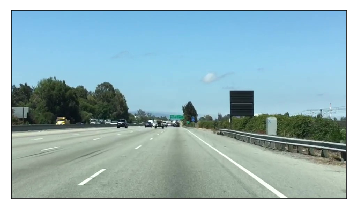

Color selection


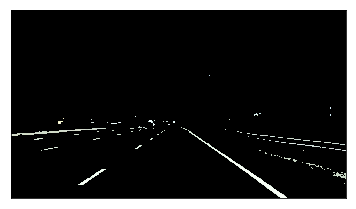

In [2]:
# Read in the image
image = mpimg.imread('input/test.jpg')
print('Original')
plt.imshow(image)
image_helper.show()

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 195
green_threshold = 195
blue_threshold = 195
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (image[:,:,0] < rgb_threshold[0]) \
            | (image[:,:,1] < rgb_threshold[1]) \
            | (image[:,:,2] < rgb_threshold[2])
color_select[thresholds] = [0,0,0]

# Display the image
print('Color selection')
plt.imshow(color_select)
image_helper.save('output/color-selection.png')
image_helper.show()

# Color Region

Select white line


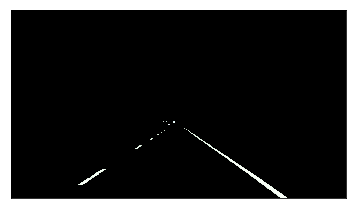

Highlight line


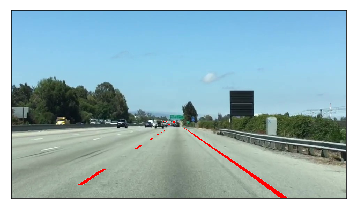

Combined


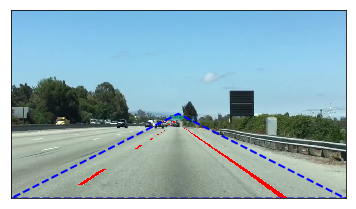

In [3]:
# Read in the image
image = mpimg.imread('input/test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

# Define color selection criteria
# MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left
# MODIFY THESE VALUES TO ISOLATE THE REGION 
# WHERE THE LANE LINES ARE IN THE IMAGE
left_bottom = [0, ysize]
right_bottom = [xsize, ysize]
apex = [xsize/2, ysize * 0.55]

# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
                    
# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
print('Select white line')
plt.imshow(color_select)
image_helper.save('output/color-region-select-white-line.png')
image_helper.show()

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]
print('Highlight line')
plt.imshow(line_image)
image_helper.save('output/color-region-highlight-line.png')
image_helper.show()

# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=2)
# plt.imshow(color_select)
plt.imshow(line_image)
print('Combined')
image_helper.save('output/color-region-combined.png')
image_helper.show()